# Collection of completed code 
#### This jupyter notebook is a collection of each individual piece of code that is required for my individual project. It's used as a timeline to reference and work out what code has been completely written

## Wednesday 18th June - Steady Sate Equation Solve

We take the initial differential equation for the thin films and integrate it to get 
$$
\frac{\partial h}{\partial t} = h^3\frac{\partial^3h}{\partial x^3} + h = \tilde{Q},
$$
where $\tilde{Q}$ is the dimensionless flux, to be constant at $q(x=0)$ and experimented with. We set $\frac{\partial h}{\partial t} = 0,$ then transform the ODE into a system of first order ODEs, where
$$
\vec{y} = \begin{bmatrix}
            y_1 = h \\ y_2 = \frac{dh}{dx} \\ y_3 = \frac{d^2h}{dx^2}
            \end{bmatrix}
$$

meaning 

$$
\dot{\vec{y}} = \begin{bmatrix}
            \dot{y_1} = y_2 \\ \dot{y_2} = y_3 \\ \dot{y_3} = \frac{\tilde{Q}-y_1}{y_1^3}.
            \end{bmatrix}
$$
We also have the boundary conditions
$$
\begin{aligned}
y_1(x=0) = 1 \\
y_2(x=L) = 0.5 \\
y_1(x=L) = \tilde{Q},
\end{aligned}
$$

We then implement this using scipy's ```solve_bvp``` function.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_bvp
from scipy.integrate import solve_ivp

In [2]:
N = 1_000                                       # Number of grid points
Q = 0.9
h_0 = 1.0

##### We define the system of ODEs and the BCs

In [3]:
def ODE(x, y, a, Q=Q):
    """
    Split ODE into three first order ODEs, returns the derivative of the vector y linking the ODEs. Variable 'a' represents the non-linearity in the model, when set to 0, there is no non-linearity.
    """
    dy_3 = (Q-y[0])/(y[0]**a)
    return np.array([y[1], y[2], dy_3])

def bc(x_zero, x_L, Q=Q):
    """
    Boundary conditions for the BVP to show the height at each boundary and flux at x=0.
    """
    return np.array([x_zero[0]-1, x_L[2], x_L[0]-Q])

##### Define the solution and plotting functions

In [4]:
def solver(q, L, a=3):
    """
    Uses scipy integrate to solve the boundary value problem
    """
    x = np.linspace(0, L, N)
    y = np.zeros((3, x.size))
    y[0] = h_0
    solution = solve_bvp(lambda x,y: ODE(x, y, a=a, Q=q), lambda x,y: bc(x, y, Q=q), x, y, tol=1e-5, max_nodes=1_000_000)
    return solution

def plot_solution(solution, q, axes=None):
    """
    Plots the solution to the numerically solved thin film equation, adds a diagram of the extruder also
    """
    if axes is None:
        fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))
    axes.plot(solution.x, solution.y[0], color='g', linestyle='-', linewidth=2)
    axes.set_title(f'Solution to BVP (Q={q}) \n $h(x=0)={h_0}$')
    

##### Then run it all!

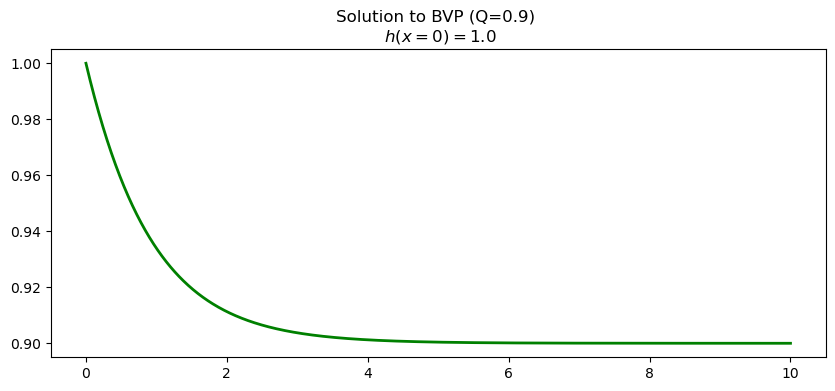

In [5]:
solution = solver(q=Q, L = 10, a=3)
plot_solution(solution, Q)

#### Experimentation with different fluxes 

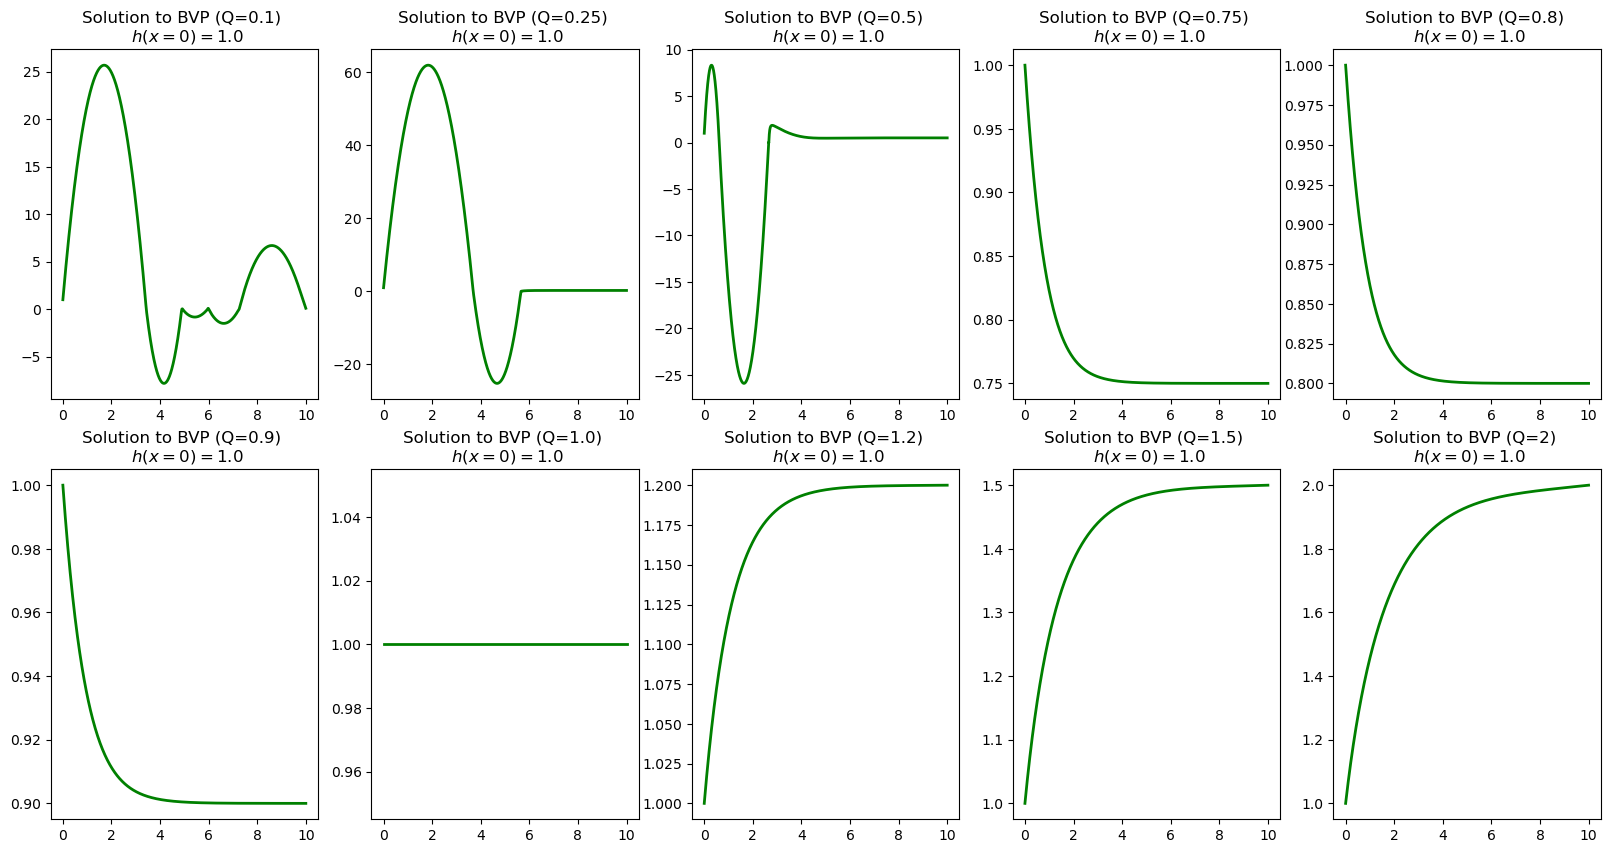

In [6]:
Q_list = [0.1, 0.25, 0.5, 0.75, 0.8, 0.9, 1.0, 1.2, 1.5, 2]

rows = 2
cols = 5

fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(20, 10))
count = 0
for i in range(rows):
    for j in range(cols):
        Q_ = Q_list[count]
        solution = solver(q=Q_, L=10, a=3)
        plot_solution(solution, Q_, ax[i, j])
        count += 1

### Summarising plots:
    2 Plots h on x
        1. Varying Q against an L Q = [], on same plot linear solution as dashed line
        2. Varying L for one value of Q to show how L affects teh solution slightly. 

Success! Both solutions were found

Success! Both solutions were found

Success! Both solutions were found

Success! Both solutions were found

Success! Both solutions were found



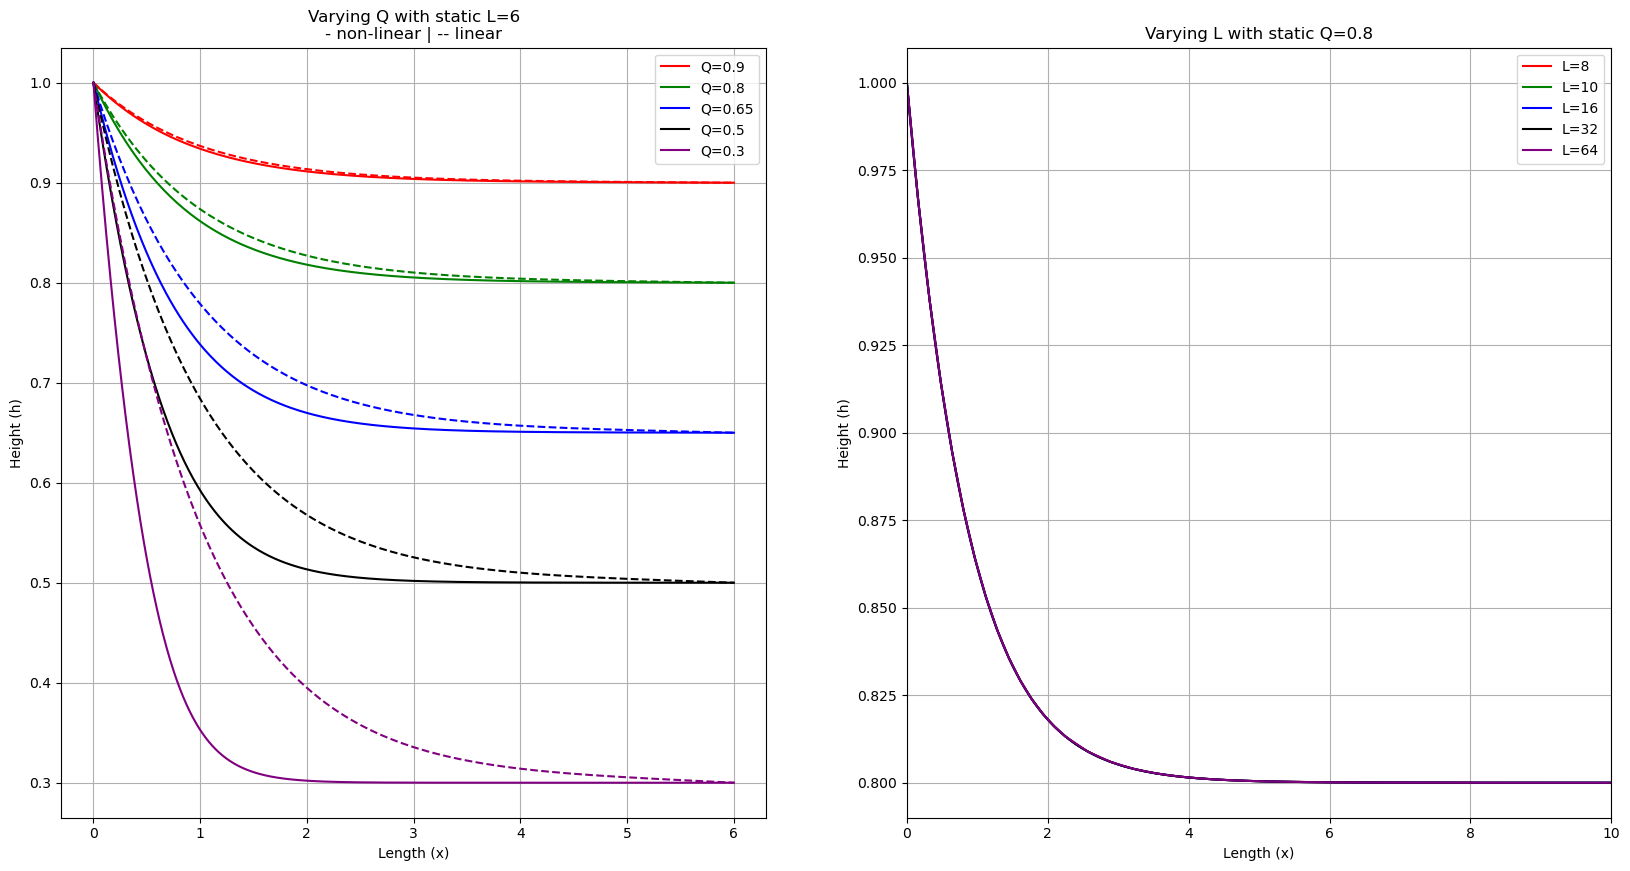

In [82]:
# Varying Q 
static_L = 6
static_Q = 0.8

Q = [0.9, 0.8, 0.65, 0.5, 0.3]
L = [8, 10, 16, 32, 64]

colors = ['red', 'green', 'blue', 'black', 'purple']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

assert len(Q) == len(L)
for i in range(len(Q)):
    q = Q[i]
    l = L[i]
    solution_static_L = solver(q=q, L=static_L)
    solution_static_Q = solver(q=static_Q, L=l)

    solution_static_L_linear = solver(q=q, L=static_L, a=0)
    solution_static_Q_linear = solver(q=static_Q, L=l, a=0)

    # Non-linear plots
    axes[0].plot(solution_static_L.x, solution_static_L.y[0], label=f"Q={q}", color=colors[i], linestyle='-')
    axes[1].plot(solution_static_Q.x, solution_static_Q.y[0], label=f"L={l}", color=colors[i], linestyle='-')

    # Linear plots
    axes[0].plot(solution_static_L_linear.x, solution_static_L_linear.y[0], color=colors[i], linestyle='--')

    if solution_static_L.status == 1 or solution_static_Q.status == 1:
        print("Error found, a solution did not succeed to find a solution")
        print(f"Solution 1: {solution_static_L.status} | Solution 2: {solution_static_Q.status}\n")
    else:
        print(f"Success! Both solutions were found\n")

axes[0].set_title(f"Varying Q with static L={static_L}\n- non-linear | -- linear")
axes[1].set_title(f'Varying L with static Q={static_Q}')

axes[0].legend()
axes[1].legend()

axes[0].grid()
axes[1].grid()

axes[1].set_xlim(0, 10)

axes[0].set_xlabel('Length (x)')
axes[0].set_ylabel('Height (h)')

axes[1].set_xlabel('Length (x)')
axes[1].set_ylabel('Height (h)')

# fig.savefig('/Users/jackroberts/Documents/PMSC/IndProj/Master/texts/results/figures/steady-state-newtonian-no-disjoining-pressure.png', bbox_inches='tight')

## Monday 8th July - Startup-Flow Solve

The startup flow includes the time derivative, we see the film develop over time to hopefully produce the same thing as the steady state flow. We used the finite volume method to solve this PDE to ensure conservation of the mass of our 'quantities'

##### Set initial values

In [32]:
N = 10000                         # Number of grid points
L = 10                          # Length of surface
dx = L/N                        # Change in x, used in solve

h_0 = 5.0                       # Initial height of the extruder
Q = 0.75                        # Flux of slurry coming from the extruder, can vary this

x = np.linspace(0, L, N)        # Array for x, used in plotting
h_initial = np.zeros(N)         # Initial guess for solver
h_initial[0] = h_0              # Only BC we impose is the first index of h_initial is h_0

t_span = (0, 100)               # Length of time we want to pass when we solve this

##### Create function that uses finite differences to make a step in space, $\frac{\partial h}{\partial t}^j_{i+1} = -\nabla \cdot q$. This computes the quantity of mass coming into and out of every volume, denoted as $q_{i\pm\frac{1}{2}}$.

In [33]:
def make_step(h, i, dx, pwr):
    """
    Try, excepts are for the BCs, as q_minus won't be computable for BCs at the start and q_plus won't be computable
    for BCs at the end.
    """
    Dx = 1/dx**3
    try:
        non_linear_term =  ((h[i] + h[i+1])/2)**pwr
        q_plus = Dx * non_linear_term * (-h[i-1] + 3*h[i] - 3*h[i+1] + h[i+2]) + h[i]
    except IndexError: q_plus = 0

    try:
        non_linear_term =  ((h[i] + h[i-1])/2)**pwr
        q_minus = Dx * non_linear_term * (-h[i-2] + 3*h[i-1] - 3*h[i] + h[i+1]) + h[i-1]
    except IndexError: q_minus = 0

    return q_plus, q_minus

We are using scipy's ```solve_ivp``` function, so we construct the RHS of the PDE in function ```f``` whilst imposing the boundary conditions:
$$
\begin{aligned}
h[0] = h_0 \\
dhdt[1] = -\frac{q_{i+\frac{1}{2}} - Q}{dx} \\
dhdt[N-2] = -\frac{h[N-2] - q_{i-\frac{1}{2}}}{dx} \\
dhdt[N-1] = dhdt[N-2]
\end{aligned}
$$

In [34]:
def f(t, h, Q, dx, pwr):
    h = h.copy()
    dhdt = np.zeros_like(h)

    # i = 0
    h[0] = h_0

    # i = 1
    q_plus, q_minus = make_step(h=h, i=1, dx=dx, pwr=pwr)
    dhdt[1] = - (q_plus - Q) / dx

    # i = N - 2
    q_plus, q_minus = make_step(h=h, i=N-2, dx=dx, pwr=pwr)
    dhdt[N-2] = - (h[N-2] - q_minus) / dx

    # i = N - 1
    h[N-1] = h[N-2]
    dhdt[N-1] = dhdt[N-2]

    for i in range(2, N-2):
        q_plus, q_minus = make_step(h=h, i=i, dx=dx, pwr=pwr)
        dhdt[i] = -(q_plus - q_minus) / dx

    return dhdt

Because of the stiffness of the PDE, we are using BDF which is an implicit solver, now we solve!

In [35]:
try:
    sol = solve_ivp(fun=f, args=(Q, dx, 3), y0=h_initial, t_span=t_span, method='BDF', rtol=1e-6, atol=1e-8)

    print(sol.status)
    print(sol.success)
    print(sol.message)

except ValueError:
    print("Value Error")

KeyboardInterrupt: 

Success! Now we plot it

Text(0.5, 0, 'Length $(x)$')

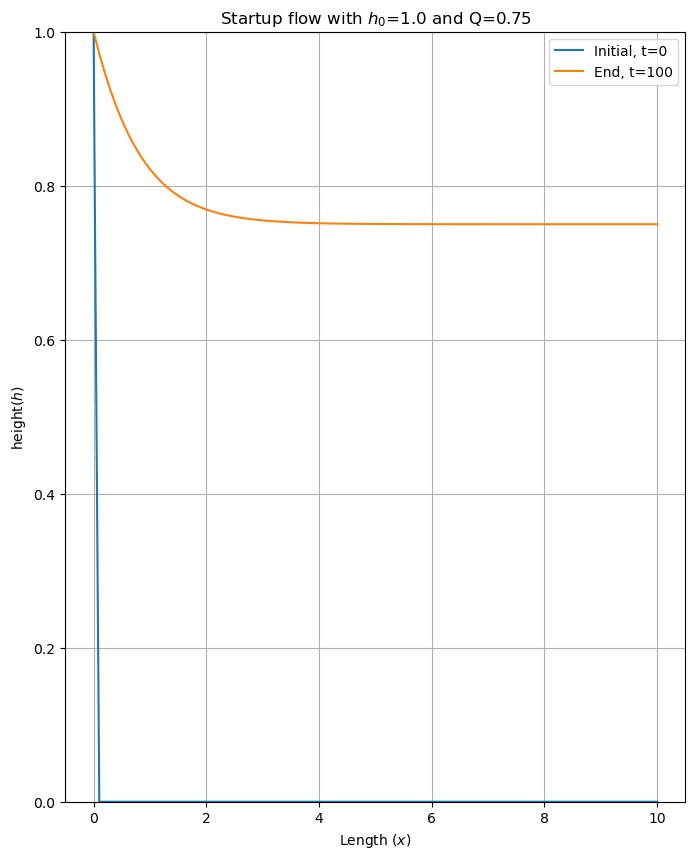

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 10))

ax.plot(x, sol.y[:, 0], label=f'Initial, t={t_span[0]}')
ax.plot(x, sol.y[:, -1], label=f'End, t={t_span[1]}')
ax.set_ylim(0, 1)
ax.grid(True)
ax.legend()
ax.set_title(f"Startup flow with $h_0$={h_0} and Q={Q}")
ax.set_ylabel('height$(h)$')
ax.set_xlabel('Length $(x)$')

Now to make a fancier graph

Text(0.5, 1.0, 'Varying L with static Q=0.8\n- non-linear | -- linear')

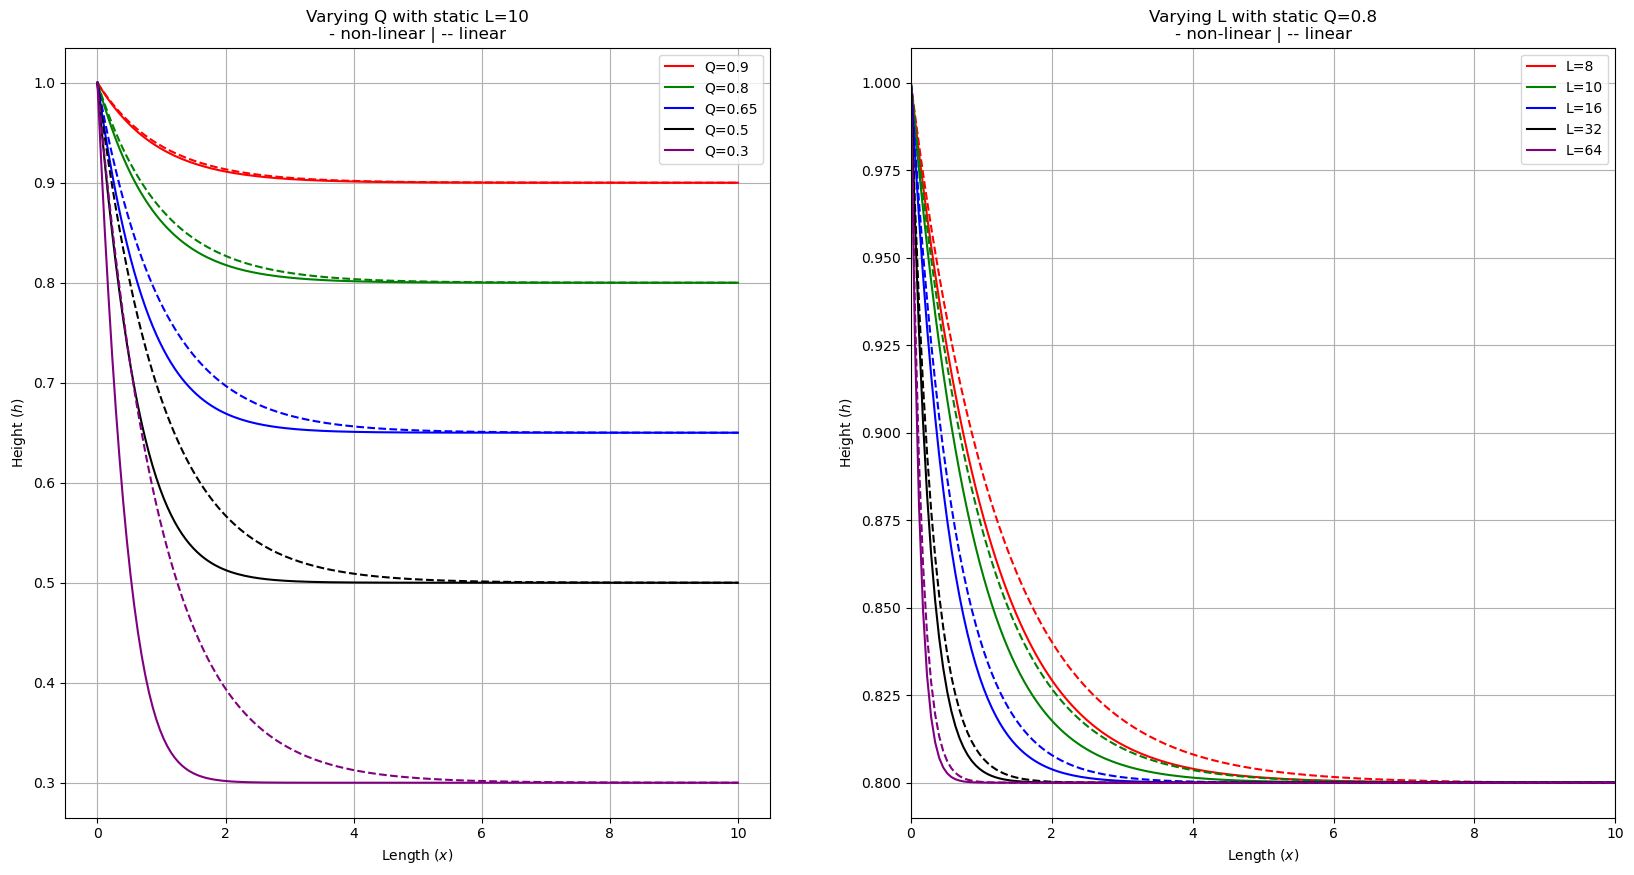

In [7]:
N = 175
t_span = (0, 10_000)
h_0 = 1.0

# Varying Q and L
static_L = 10
static_Q = 0.8

x = np.linspace(0, static_L, N)
h_initial = np.zeros(N)
h_initial[0] = h_0

Q_list = [0.9, 0.8, 0.65, 0.5, 0.3]
L_list = [8, 10, 16, 32, 64]

colors = ['red', 'green', 'blue', 'black', 'purple']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

for i in range(len(Q_list)):
    # Static L
    dx = static_L/N
    sol_non_lin = solve_ivp(fun=f, args=(Q_list[i], dx, 3), y0=h_initial, t_span=t_span, method='BDF', rtol=1e-7, atol=1e-8)
    sol_lin = solve_ivp(fun=f, args=(Q_list[i], dx, 0), y0=h_initial, t_span=t_span, method='BDF', rtol=1e-7, atol=1e-8)

    ax[0].plot(x, sol_non_lin.y[:, -1], label=f"Q={Q_list[i]}", color=colors[i], linestyle='-')
    ax[0].plot(x, sol_lin.y[:, -1], color=colors[i], linestyle='--')
    
    # Static Q
    dx = L_list[i]/N
    sol_non_lin = solve_ivp(fun=f, args=(static_Q, dx, 3), y0=h_initial, t_span=t_span, method='BDF', rtol=1e-7, atol=1e-8)
    sol_lin = solve_ivp(fun=f, args=(static_Q, dx, 0), y0=h_initial, t_span=t_span, method='BDF', rtol=1e-7, atol=1e-8)
    
    ax[1].plot(x, sol_non_lin.y[:, -1], label=f"L={L_list[i]}", color=colors[i], linestyle='-')
    ax[1].plot(x, sol_lin.y[:, -1], color=colors[i], linestyle='--')
    
ax[0].legend()
ax[0].grid()
ax[0].set_xlabel('Length $(x)$')
ax[0].set_ylabel('Height $(h)$')
ax[0].set_title(f'Varying Q with static L={static_L}\n- non-linear | -- linear')

ax[1].legend()
ax[1].grid()
ax[1].set_xlim(0, 10)
ax[1].set_xlabel('Length $(x)$')
ax[1].set_ylabel('Height $(h)$')
ax[1].set_title(f'Varying L with static Q={static_Q}\n- non-linear | -- linear')

test to see if length scale is because of dx

Text(0.5, 1.0, 'Varying L with static Q=0.8\n- non-linear | -- linear')

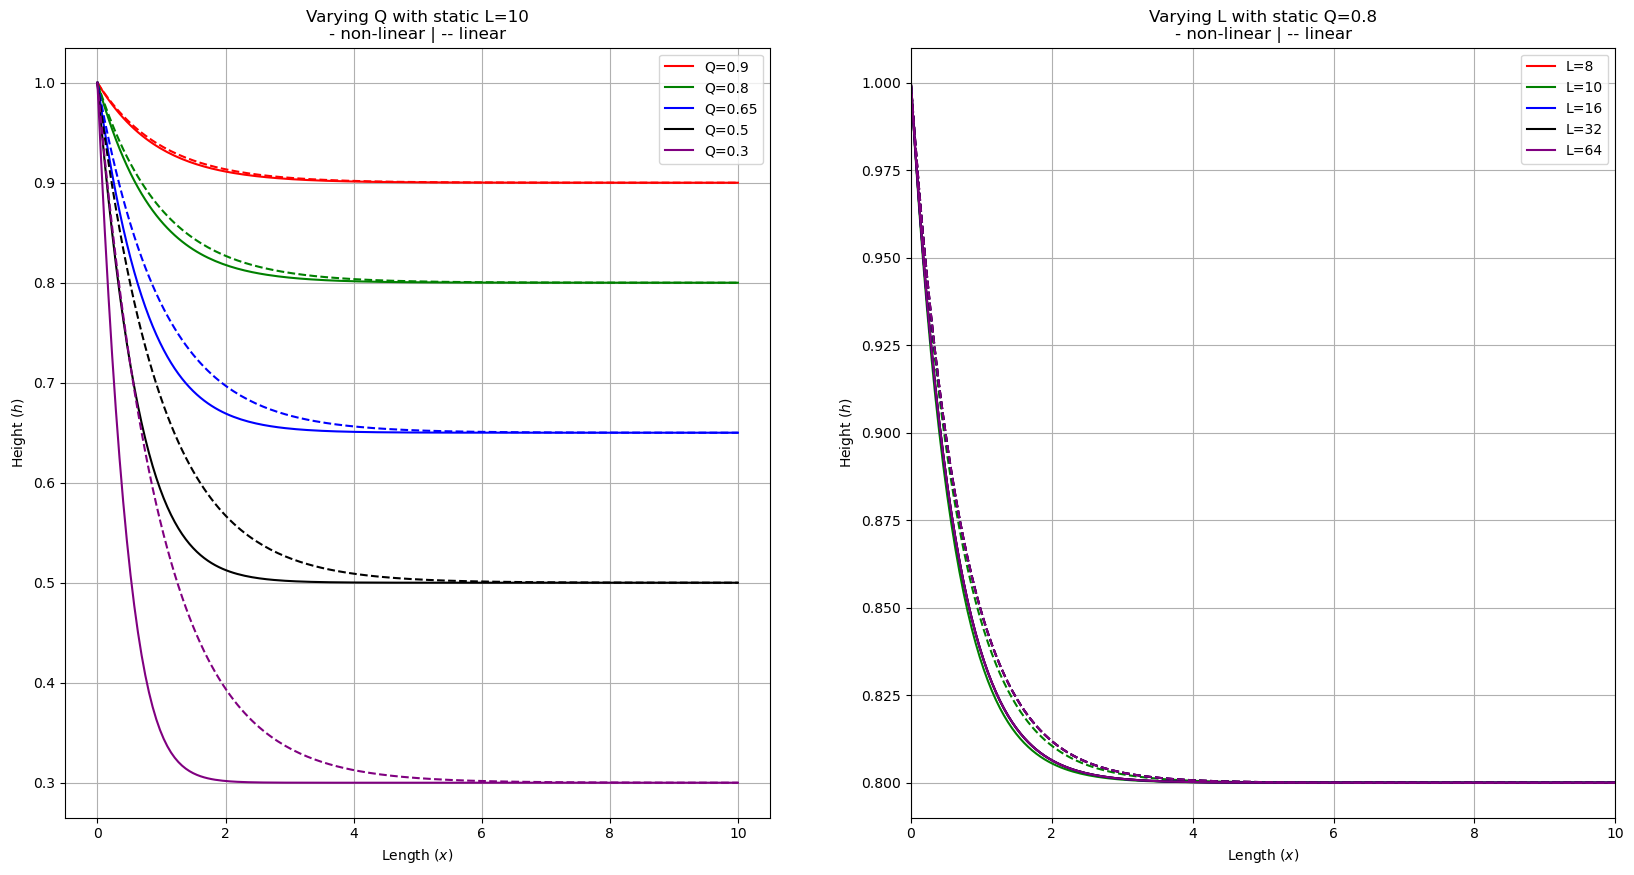

In [16]:
N = 175
t_span = (0, 1_000)
h_0 = 1.0

# Varying Q and L
static_L = 10
static_Q = 0.8

x = np.linspace(0, static_L, N)
h_initial = np.zeros(N)
h_initial[0] = h_0

Q_list = [0.9, 0.8, 0.65, 0.5, 0.3]
L_list = [8, 10, 16, 32, 64]
N_list = [100, 120, 200, 400, 800]

colors = ['red', 'green', 'blue', 'black', 'purple']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

for i in range(len(Q_list)):
    # Static L
    dx = static_L/N
    sol_non_lin = solve_ivp(fun=f, args=(Q_list[i], dx, 3), y0=h_initial, t_span=t_span, method='BDF', rtol=1e-7, atol=1e-8)
    sol_lin = solve_ivp(fun=f, args=(Q_list[i], dx, 0), y0=h_initial, t_span=t_span, method='BDF', rtol=1e-7, atol=1e-8)

    ax[0].plot(x, sol_non_lin.y[:, -1], label=f"Q={Q_list[i]}", color=colors[i], linestyle='-')
    ax[0].plot(x, sol_lin.y[:, -1], color=colors[i], linestyle='--')
    
    # Static Q
    dx = L_list[i]/N_list[i]
    sol_non_lin = solve_ivp(fun=f, args=(static_Q, dx, 3), y0=h_initial, t_span=t_span, method='BDF', rtol=1e-7, atol=1e-8)
    sol_lin = solve_ivp(fun=f, args=(static_Q, dx, 0), y0=h_initial, t_span=t_span, method='BDF', rtol=1e-7, atol=1e-8)
    
    ax[1].plot(x, sol_non_lin.y[:, -1], label=f"L={L_list[i]}", color=colors[i], linestyle='-')
    ax[1].plot(x, sol_lin.y[:, -1], color=colors[i], linestyle='--')
    
ax[0].legend()
ax[0].grid()
ax[0].set_xlabel('Length $(x)$')
ax[0].set_ylabel('Height $(h)$')
ax[0].set_title(f'Varying Q with static L={static_L}\n- non-linear | -- linear')

ax[1].legend()
ax[1].grid()
ax[1].set_xlim(0, 10)
ax[1].set_xlabel('Length $(x)$')
ax[1].set_ylabel('Height $(h)$')
ax[1].set_title(f'Varying L with static Q={static_Q}\n- non-linear | -- linear')